In [13]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [14]:
os.chdir('/Users/jasonzhi/2019spring/DS 502/Project/us-education-datasets-unification-project')
us_education = pd.read_csv("states_all_extended.csv")
print(us_education.shape)

(498, 193)


In [19]:
# ARIMA
## Load data
ts = pd.concat([us_education[['YEAR', 'TOTAL_EXPENDITURE']]], axis = 1).dropna()
ts.index = pd.Index(sm.tsa.datetools.dates_from_range('1','447'))

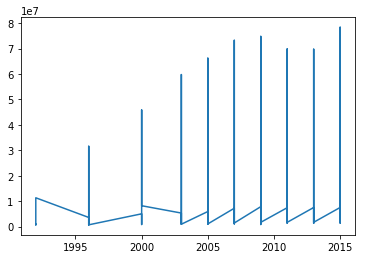

In [20]:
#ts_M4['AVG_MATH_4_SCORE'] = np.log(ts_M4['AVG_MATH_4_SCORE'])

plt.plot(ts['YEAR'], ts['TOTAL_EXPENDITURE'])


In [21]:
## ADF test
t=sm.tsa.stattools.adfuller(ts['TOTAL_EXPENDITURE'], )
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)



                                  value
Test Statistic Value           -3.75001
p-value                      0.00346224
Lags Used                            17
Number of Observations Used         429
Critical Value(1%)             -3.44569
Critical Value(5%)              -2.8683
Critical Value(10%)            -2.57037


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


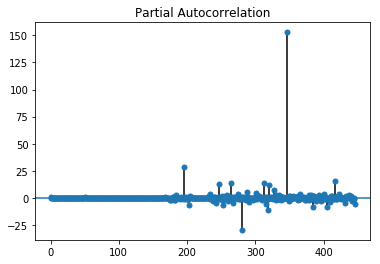

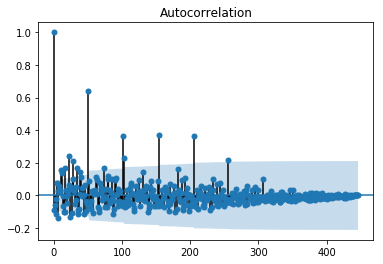

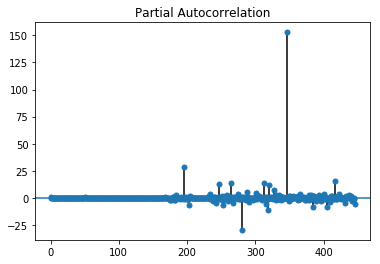

In [22]:
plot_acf(ts['TOTAL_EXPENDITURE'])
plot_pacf(ts['TOTAL_EXPENDITURE'])


In [23]:
## determine p,q
(p, q) =(sm.tsa.arma_order_select_ic(ts['TOTAL_EXPENDITURE'],max_ar=5,max_ma=5,ic='aic')['aic_min_order'])


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored wh

In [35]:
## prediction
arma_model = sm.tsa.ARMA(ts['TOTAL_EXPENDITURE'],(2,2)).fit(disp=-1,maxiter=100)

predict_data = arma_model.predict(start='1', end='447', dynamic = True)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'